In [1]:
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)
from windHelper import WindHelper
from factorModel.factorValidator import *
from datetime import *

# 设置开始时间和结束时间

In [2]:
beginDate = datetime(2006, 1, 1)
endDate = datetime(2017, 8, 22)

## 获取因子事件序列

In [4]:
from factorModel.factorGenerator import get_ip_ts
factor_df = get_ip_ts(beginDate, endDate)
factor_df.head()

,ip
trade_date,
2006-01-31,12.6
2006-02-28,20.1
2006-03-31,16.7
2006-04-30,16.7
2006-05-31,17.0


## 获取资产日度时间序列

In [7]:
para = "close"
asset_df = WindHelper.getTimeSeriesDataFrame(code="060E.CS", beginDate=beginDate, endDate=endDate, paraList=[para])
asset_df = asset_df.dropna()
asset_df.head()

,close
trade_date,
2006-01-04,115.1306
2006-01-05,114.2166
2006-01-06,115.4616
2006-01-09,115.3361
2006-01-10,115.3983


# 观察7-10年国开财富指数和CRB的关系

In [12]:
df = factor_df.join(asset_df, how="outer")
df = df.fillna(method="ffill")
df.dropna(inplace=True)
df.head()

,ip,close
trade_date,,
2006-01-31,12.6,116.4252
2006-02-06,12.6,116.2479
2006-02-07,12.6,116.3093
2006-02-08,12.6,116.0101
2006-02-09,12.6,116.4344


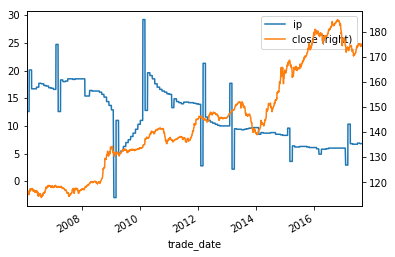

In [17]:
%matplotlib inline
df.plot(secondary_y='close')

In [18]:
import pandas_highcharts
from pandas_highcharts.display import display_charts
import matplotlib.pyplot as plt
display_charts(df, chart_type="stock",secondary_y='close', title="IP测试")

# 夏普比率校验

In [5]:
asset_series = df["0602e.cs_close"]
factor_series = df["crbsa.rb_close"]

In [26]:
config = {"relation": NEGATIVE, "type":"up", "his_count": 20,"std_count":1, "period": 5}

In [27]:
report = sharp_ratio_test(asset_series=asset_series, 
                             factor_series=factor_series, 
                             event_name="e001", 
                             config=config)

In [28]:
import pandas_highcharts
from pandas_highcharts.display import display_charts
import matplotlib.pyplot as plt
print report['excess_sp']
display_charts(report["ts"][["base","value"]], chart_type="stock", title="CRB 夏普比率测试")

0.239843740247


# 信号PAE校验

重新检视配置文件

In [41]:
config = {"relation": POSTIVE, "type":"up", "his_count": 30,"std_count":2, "period": 5}

In [42]:
report = perform_after_event(asset_series=asset_series, 
                             factor_series=factor_series, 
                             event_name="e001", 
                             config=config,
                             asset_price=True)

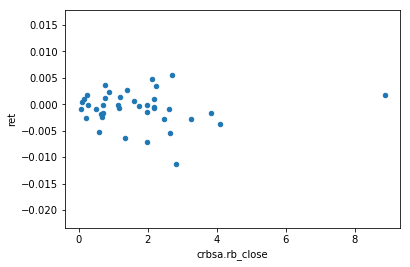

In [43]:
%matplotlib inline
report["ts"].plot(kind="scatter",x="crbsa.rb_close", y="ret")

In [22]:
len(report["ts"]["ret"][report["ts"]["ret"]<0])*1.0/len(report["ts"]["ret"])

0.5728155339805825